<a href="https://colab.research.google.com/github/rimjhimkhanna09/AIML-Advance-/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the Titanic dataset
file_path = '/content/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
basic_info = {
    "Shape": df.shape,
    "Data Types": df.dtypes,
    "Missing Values": df.isnull().sum(),
    "First 5 Rows": df.head()
}

basic_info


{'Shape': (891, 12),
 'Data Types': PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object,
 'Missing Values': PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 'First 5 Rows':    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0   

In [2]:
# Step 2: Handling missing values

# Fill missing 'Age' values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop 'Cabin' due to excessive missing values
df.drop('Cabin', axis=1, inplace=True)

# Fill missing 'Embarked' values with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Confirm changes
missing_values_after = df.isnull().sum()
missing_values_after


<ipython-input-2-5f25ef8745d3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-2-5f25ef8745d3>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [3]:
# Step 3: Encoding categorical variables

# Encode 'Sex' using label encoding (male=0, female=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' and drop the first dummy variable to avoid multicollinearity
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Display the first 5 rows after encoding
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numerical columns to scale
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Fit and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# View the changes
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age     SibSp  \
0                            Braund, Mr. Owen Harris    0 -0.565736  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.663861  0.432793   
2                             Heikkinen, Miss. Laina    1 -0.258337 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312  0.432793   
4                           Allen, Mr. William Henry    0  0.433312 -0.474545   

      Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0 -0.473674         A/5 21171 -0.502445       False        True  
1 -0.473674          PC 17599  0.786845       False       False  
2 -0.473674  STON/O2. 3101282 -0.488854       False        True  
3 -0.473674            113803  0

In [5]:
from sklearn.preprocessing import StandardScaler

# Step 4: Standardize numerical features
scaler = StandardScaler()

# Selecting numerical columns to scale
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first 5 rows after standardization
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,0.432793,-0.473674,PC 17599,0.786845,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,0.432793,-0.473674,113803,0.420730,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,-0.474545,-0.473674,373450,-0.486337,False,True


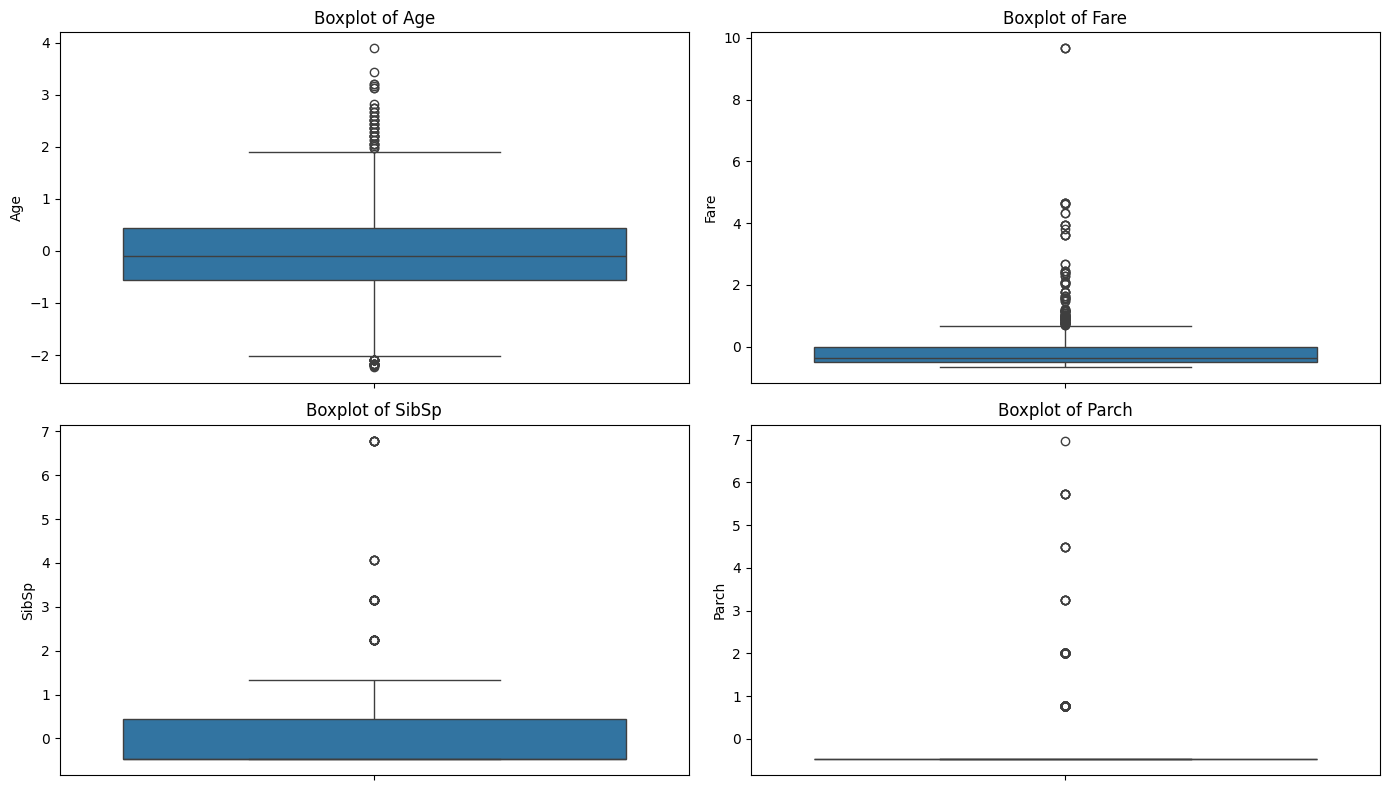

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for each numerical feature
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each column
for col in numerical_cols:
    df = remove_outliers(df, col)
